# Test Evaluation Metrics

During evaluation when training the model, images are put into `metrics/PRED_DIR/` and `metrics/TARG_DIR/`, so this file is used to visually test the results.

In [13]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
import glob
import os
import random

In [43]:
TYPE = "post" # localization or damage

In [44]:
image_names = [os.path.basename(path) for path in glob.glob("./metrics/PRED_DIR/*{}*".format(TYPE))]
image_name = image_names[random.randint(0, len(image_names) - 1)]
print("image_name: {}".format(image_name))

image_name: hurricane-florence_00000153_post_disaster.png


In [45]:
pred_image = cv2.imread("./metrics/PRED_DIR/{}".format(image_name))
targ_image = cv2.imread("./metrics/TARG_DIR/{}".format(image_name))
orig_image = cv2.imread("./data/train/images/{}".format(image_name))

In [46]:
def get_image_with_class_value(image, value):
    return np.where(image == value, 1, 0).astype("uint8") * 255

Pred, original, targ


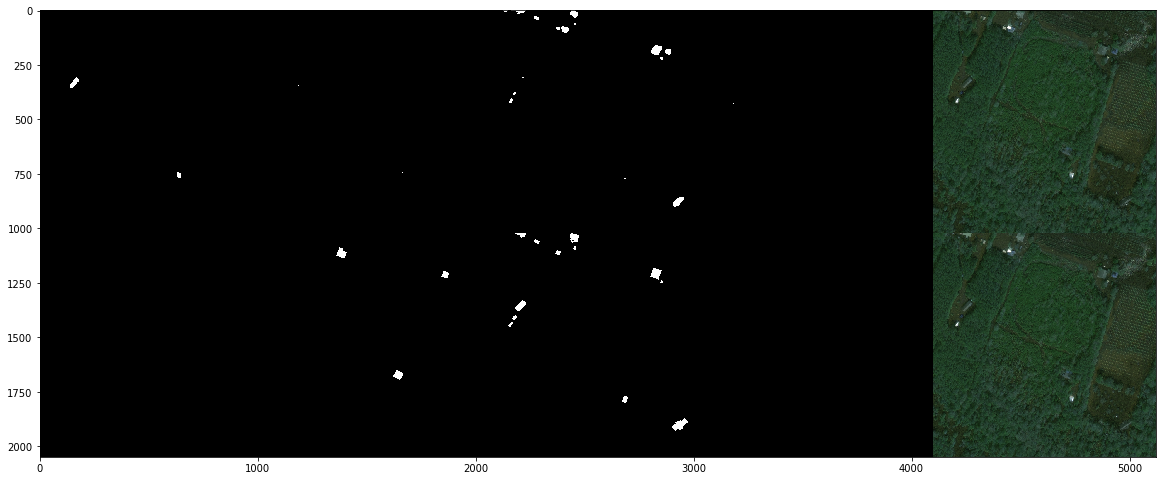

In [47]:
if TYPE == "pre":
    image = np.hstack([pred_image * 255, orig_image, targ_image * 255])
    plt.figure(figsize=(20, 10))
    plt.imshow(image)
    print("Pred, original, targ")
elif TYPE == "post":
    top_image = np.hstack([
        get_image_with_class_value(pred_image, 1),
        get_image_with_class_value(pred_image, 2),
        get_image_with_class_value(pred_image, 3),
        get_image_with_class_value(pred_image, 4),
        orig_image])
    bottom_image = np.hstack([
        get_image_with_class_value(targ_image, 1),
        get_image_with_class_value(targ_image, 2),
        get_image_with_class_value(targ_image, 3),
        get_image_with_class_value(targ_image, 4),
        orig_image])
    image = np.vstack([top_image, bottom_image])
    plt.figure(figsize=(20, 10))
    plt.imshow(image)
    print("Pred, original, targ")